# Philly Crime Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cartodb-query.csv')
df

,the_geom,cartodb_id,the_geom_webmercator,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y
0,0101000020E6100000D838EED62ABF52C054C37E4FAC08...,3023575,0101000020110F00009786C060DED75FC1EFEEAA698499...,6399303,8,2,2023-02-10 01:54:00+00,2023-02-09,20:54:00,NaN,202308004815,3700 BLOCK S HEREFORD LA,800,Other Assaults,-74.986990,40.067758
1,0101000020E6100000100DE60ACACA52C006348DFD1707...,3023458,0101000020110F00002B87430F9CEB5FC1D749BDBEC397...,6391896,14,1,2023-02-10 01:43:00+00,2023-02-09,20:43:00,NaN,202314007169,6300 BLOCK MILTON ST,2600,All Other Offenses,-75.168582,40.055420
2,0101000020E6100000484E899810C952C08209922D0107...,3023423,0101000020110F00001F97CA37AEE85FC117CED26EAA97...,6392800,35,1,2023-02-10 01:33:00+00,2023-02-09,20:33:00,NaN,202335009116,6600 BLOCK N BROAD ST,800,Other Assaults,-75.141638,40.054723
3,0101000020E6100000C79AD35D80CA52C0FFF06FA75FFE...,3023518,0101000020110F00000ABED5E91EEB5FC1FE0D6804188E...,6394818,22,1,2023-02-10 01:19:00+00,2023-02-09,20:19:00,NaN,202322008012,1800 BLOCK W SUSQUEHANNA AV,1800,Narcotic / Drug Law Violations,-75.164085,39.987294
4,0101000020E6100000B7EF728DA6CE52C0E392FCEB8906...,3023485,0101000020110F00002D2BAD242BF25FC17F6AF01C2697...,6399017,5,3,2023-02-10 00:58:00+00,2023-02-09,19:58:00,NaN,202305001798,600 BLOCK RENZ ST,1100,Fraud,-75.228916,40.051084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023690,0101000020E6100000253C2510C4CE52C0FD6C608205F8...,213015,0101000020110F000049B016455DF25FC11681C4200E87...,227016,12,P,2006-01-01 05:05:00+00,2006-01-01,00:05:00,0.0,200612000011,1700 BLOCK S 58TH ST,1500,Weapon Violations,-75.230717,39.937668
3023691,0101000020E6100000E4166F3BDFCE52C01D9E90630CFA...,212954,0101000020110F0000C395586B8BF25FC1125A71F14C89...,232693,18,Q,2006-01-01 05:04:00+00,2006-01-01,00:04:00,0.0,200618000007,400 BLOCK S 55TH ST,1500,Weapon Violations,-75.232375,39.953503
3023692,0101000020E6100000729AB291F3C952C078026918A1F8...,111028,0101000020110F00008C4141C12FEA5FC1FAA9EC78BA87...,113325,3,I,2006-01-01 05:02:00+00,2006-01-01,00:02:00,0.0,200603000001,S 08TH ST / SOUTH ST,2600,All Other Offenses,-75.155491,39.942416
3023693,0101000020E6100000F1F87276DDCE52C0F1C6D50A4BFB...,142579,0101000020110F0000EDDCE76988F25FC1A2977403AE8A...,144878,19,R,2006-01-01 05:02:00+00,2006-01-01,00:02:00,0.0,200619000047,5500 BLOCK CHERRY ST,800,Other Assaults,-75.232267,39.963228


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023695 entries, 0 to 3023694
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   the_geom              object 
 1   cartodb_id            int64  
 2   the_geom_webmercator  object 
 3   objectid              int64  
 4   dc_dist               int64  
 5   psa                   object 
 6   dispatch_date_time    object 
 7   dispatch_date         object 
 8   dispatch_time         object 
 9   hour_                 float64
 10  dc_key                int64  
 11  location_block        object 
 12  ucr_general           int64  
 13  text_general_code     object 
 14  point_x               float64
 15  point_y               float64
dtypes: float64(3), int64(5), object(8)
memory usage: 369.1+ MB


## Data Cleaning

**Droping Columns**

In [5]:
df.columns

Index(['the_geom', 'cartodb_id', 'the_geom_webmercator', 'objectid', 'dc_dist',
       'psa', 'dispatch_date_time', 'dispatch_date', 'dispatch_time', 'hour_',
       'dc_key', 'location_block', 'ucr_general', 'text_general_code',
       'point_x', 'point_y'],
      dtype='object')

In [6]:
df = df.drop(columns=['the_geom', 'cartodb_id', 'the_geom_webmercator', 'objectid', 'dc_dist',
       'psa', 'dispatch_date_time', 'hour_',
       'dc_key', 'ucr_general',])

**Dropping Rows**

In [8]:
df.isnull().sum()

dispatch_date            0
dispatch_time            0
location_block         129
text_general_code        0
point_x              44158
point_y              44158
dtype: int64

**drop rows if `NaN`**

In [9]:
df = df[df['point_x'].notna()]

In [10]:
df.isnull().sum() #verify that NaN values are dropped

dispatch_date         0
dispatch_time         0
location_block       58
text_general_code     0
point_x               0
point_y               0
dtype: int64

In [11]:
df['text_general_code'].unique()

array(['Other Assaults', 'All Other Offenses',
       'Narcotic / Drug Law Violations', 'Fraud', 'Thefts',
       'Aggravated Assault Firearm', 'Robbery Firearm',
       'Vandalism/Criminal Mischief', 'Weapon Violations',
       'Motor Vehicle Theft', 'Theft from Vehicle',
       'Aggravated Assault No Firearm', 'Burglary Non-Residential',
       'Rape', 'Burglary Residential', 'Receiving Stolen Property',
       'Robbery No Firearm', 'Disorderly Conduct',
       'Other Sex Offenses (Not Commercialized)',
       'DRIVING UNDER THE INFLUENCE', 'Arson',
       'Offenses Against Family and Children',
       'Forgery and Counterfeiting', 'Embezzlement', 'Public Drunkenness',
       'Liquor Law Violations', 'Homicide - Criminal',
       'Homicide - Criminal ', 'Prostitution and Commercialized Vice',
       'Homicide - Justifiable ', 'Gambling Violations',
       'Vagrancy/Loitering', 'Homicide - Gross Negligence'], dtype=object)

In [12]:
df.columns = df.columns.str.replace('text_general_code', 'crime_category')

## Filter Data 2022

In [37]:
year_2022 = df[(df['dispatch_date'] >= '2022-01-01') & (df['dispatch_date'] < '2023-01-01')]
year_2022

,dispatch_date,dispatch_time,location_block,crime_category,point_x,point_y
17540,2022-12-31,23:56:00,1300 BLOCK W OLNEY AV,All Other Offenses,-75.142990,40.038468
17541,2022-12-31,23:56:00,1300 BLOCK W OLNEY AV,All Other Offenses,-75.142990,40.038468
17542,2022-12-31,23:53:00,6300 BLOCK MARTINS MILL RD,Robbery No Firearm,-75.091059,40.046574
17543,2022-12-31,23:53:00,4000 BLOCK LANCASTER AV,Vandalism/Criminal Mischief,-75.205298,39.965255
17544,2022-12-31,23:43:00,MORRELL AV & W CROWN AV,All Other Offenses,-74.988342,40.067802
...,...,...,...,...,...,...
170718,2022-01-01,00:12:00,1900 BLOCK N FRANKLIN ST,Weapon Violations,-75.147117,39.981327
170719,2022-01-01,00:12:00,1900 BLOCK N 25TH ST,Aggravated Assault Firearm,-75.175963,39.985499
170720,2022-01-01,00:03:00,3600 BLOCK W CROWN AV,Weapon Violations,-74.990633,40.068643
170721,2022-01-01,00:00:00,100 BLOCK E LURAY ST,Homicide - Criminal,-75.123342,40.020612


### Count of each crime_category

In [91]:
year_2023['crime_category'].value_counts()

Thefts                                     3563
Other Assaults                             2671
Motor Vehicle Theft                        2338
Vandalism/Criminal Mischief                1730
Theft from Vehicle                         1434
All Other Offenses                         1242
Fraud                                       873
Aggravated Assault No Firearm               561
Burglary Residential                        371
Aggravated Assault Firearm                  369
Weapon Violations                           342
Robbery Firearm                             312
Robbery No Firearm                          293
Narcotic / Drug Law Violations              292
Burglary Non-Residential                    178
Receiving Stolen Property                   159
Other Sex Offenses (Not Commercialized)     149
Rape                                         75
DRIVING UNDER THE INFLUENCE                  73
Arson                                        58
Offenses Against Family and Children    

## Filter Data 2023

In [104]:
year_2023 = df[(df['dispatch_date'] >= '2023-01-01')]

### 2023 crime data simplified
**Grouping into: theft, assault, drugs, homicide, rape**

In [105]:
year_2023_simplified = year_2023.replace(to_replace=['Thefts', 'Theft from Vehicle', 'Motor Vehicle Theft'], value='Theft')
year_2023_simplified = year_2023_simplified.replace(to_replace=['Other Assaults', 'Aggravated Assault No Firearm', 'Aggravated Assault Firearm'], value='Assault')
year_2023_simplified = year_2023_simplified.replace(to_replace=['Robbery Firearm', 'Robbery No Firearm'], value='Robbery')
year_2023_simplified = year_2023_simplified.replace(to_replace=['Narcotic / Drug Law Violations'], value='Drug Violation')
year_2023_simplified = year_2023_simplified.replace(to_replace=['Homicide - Criminal'], value='Homicide')

**Create seperate DataFrame for each simplified crime category**

In [108]:
values = ['Theft', 'Assault', 'Homicide', 'Drug Violation', 'Robbery', 'Rape']
year_2023_SIMPLIFIED = year_2023_simplified[year_2023_simplified['crime_category'].isin(values)]

In [106]:
year_2023_Theft = year_2023_simplified[year_2023_simplified['crime_category'].isin(['Theft'])]
year_2023_Assault = year_2023_simplified[year_2023_simplified['crime_category'].isin(['Assault'])]
year_2023_Homicide = year_2023_simplified[year_2023_simplified['crime_category'].isin(['Homicide'])]
year_2023_Drug_Violation = year_2023_simplified[year_2023_simplified['crime_category'].isin(['Drug Violation'])]
year_2023_Robbery = year_2023_simplified[year_2023_simplified['crime_category'].isin(['Robbery'])]
year_2023_Rape = year_2023_simplified[year_2023_simplified['crime_category'].isin(['Rape'])]

In [101]:
# test
year_2023_Rape

,dispatch_date,dispatch_time,location_block,crime_category,point_x,point_y
63,2023-02-09,17:14:00,900 BLOCK KENMORE RD,Rape,-75.251723,39.976580
66,2023-02-09,17:11:00,300 BLOCK W FISHER AV,Rape,-75.128964,40.031384
421,2023-02-08,20:07:00,8000 BLOCK GILBERT ST,Rape,-75.171778,40.072448
545,2023-02-08,16:20:00,8300 BLOCK JEANES ST,Rape,-75.077718,40.081283
1240,2023-02-07,04:56:00,S 10TH ST & SPRUCE ST,Rape,-75.157909,39.946135
...,...,...,...,...,...,...
16359,2023-01-03,18:00:00,6800 BLOCK SOUDER ST,Rape,-75.068951,40.042890
16387,2023-01-03,16:56:00,2000 BLOCK N PARK AV,Rape,-75.155461,39.983825
16916,2023-01-02,16:02:00,600 BLOCK N BROAD ST,Rape,-75.160514,39.964555
17203,2023-01-01,22:10:00,4200 BLOCK FRANKFORD AV,Rape,-75.089902,40.009118


In [115]:
year_2023_Homicide['crime_category'].value_counts()

Homicide    29
Name: crime_category, dtype: int64

### Write

In [17]:
pwd

'C:\\Users\\hangh\\VS Code Workspace\\owlhack'

In [18]:
import os
os.getcwd()

'C:\\Users\\hangh\\VS Code Workspace\\owlhack'

In [19]:
year_2022.to_csv('Philly Crime Stat 2022.csv', index = True)

In [107]:
year_2023_Theft.to_csv('Philly Crime Stat 2023 THEFT.csv', index = True)
year_2023_Assault.to_csv('Philly Crime Stat 2023 ASSAULT.csv', index = True)
year_2023_Homicide.to_csv('Philly Crime Stat 2023 HOMICIDE.csv', index = True)
year_2023_Drug_Violation.to_csv('Philly Crime Stat 2023 DRUG VIOLATION.csv', index = True)
year_2023_Robbery.to_csv('Philly Crime Stat 2023 ROBBERY.csv', index = True)
year_2023_Rape.to_csv('Philly Crime Stat 2023 RAPE.csv', index = True)

In [20]:
year_2023.to_csv('Philly Crime Stat 2023.csv', index = True)

## Visualization

<AxesSubplot:xlabel='crime_category', ylabel='count'>

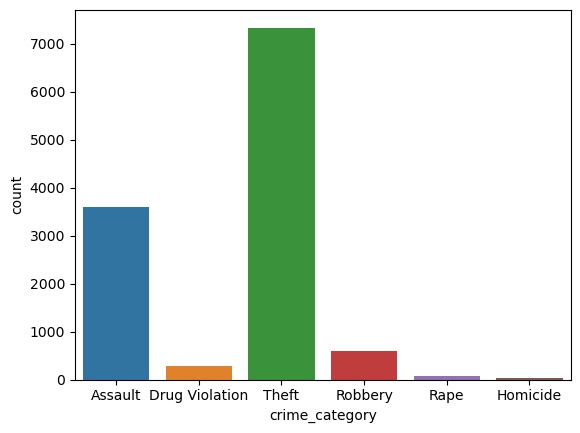

In [109]:
sns.countplot(data=year_2023_SIMPLIFIED, x='crime_category')